# <center> <u><font color="#7B241C"> Logistic Regression Classifier with sklearn API  </u> 

## Logistic Regression Syntax

```python
## Import LogisticRegression form sklearn.linear_model
from sklearn.linear_model import LogisticRegression

## Import train split data
from sklearn.model_selection import train_test_split

## Instantiate a logistic regression object
log_reg = LogisticRegression()

## Split the data
X_train, y_train, X_test, y_test = train_test_split(X, y,
                                   test_size = 0.25, random_state = 10123)

## Fit logistic model
log_reg.fit(X_train, y_train)

## Generate predictions
y_pred = log_reg.predict(y_test)

## Evaluate the model by roc_curve
from sklearn.metrics import roc_curve

## Predict the probabilities
y_pred_prob = log_reg.predict_proba(X_test)[:, desired-class(0, or 1, ...)]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
```

In [1]:
def coment(s = "="):
    print("##" + s * 50)
    print("##")
    print("##" + s * 50)

In [2]:
##==================================================
##       Importing the necessary modules
##==================================================
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.display import display
pd.options.display.float_format = '{:,.3f}'.format

## Data Description:


The dataset is available at https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data . The data has been obtained from the Cleveland region and is segregated into 14 columns. The description of each column is given below:

* age : age in years
* sex : sex (1 = male; 0 = female)
* cp : chest pain type
  + Value 1: typical angina
  + Value 2: atypical angina
  + Value 3: non-anginal pain
  + Value 4: asymptomatic
* trestbps : resting blood pressure (in mm Hg on admission to the hospital)
* chol : serum cholestoral in mg/dl
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg : resting electrocardiographic results
* thalach : maximum heart rate achieved
* exang : exercise induced angina (1 = yes; 0 = no)
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy
* thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
* num(the predicted attribute) : diagnosis of heart disease (angiographic disease status)
  + Value 0: < 50% diameter narrowing
  + Value 1: > 50% diameter narrowing

## Importing and Exploring Data 

In [3]:
##==================================================
##       Importing the data
##==================================================

diabeties = pd.read_csv('diabetes.csv')

diabeties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
##==================================================
##       Basic Summary Statistics
##==================================================
diabeties.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


## Data Preprocessing

   1 - Dealing with Missing Values
   
   
   2 - Studying the Correlation
   
   
   3 - Standardization 

In [5]:
##==================================================
##        Checking the missing data
##==================================================
num_miss_vals = (diabeties.isnull().sum())
print(num_miss_vals)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


   - It seems that the dataset has no missing values. However, should we admit that and move on to further analysis. The answer is no, a closer look at the summary statistics we that some variables have minimum value of zero, which is not possible; thus, missing data is coded as zero (0). The next variables have zero values which invalid.
   
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

We will replace the invalid values with `np.NaN`.

In [6]:
##==================================================
##        Code the missing data points correctly
##==================================================

# Make a copy from the original data
diabetes_c = diabeties.copy(deep=True)
inv_vars = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

diabetes_c[inv_vars] = diabetes_c[inv_vars].replace(0,np.NaN)

# Print the number of missing values for each variable
print(diabetes_c.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


<AxesSubplot:>

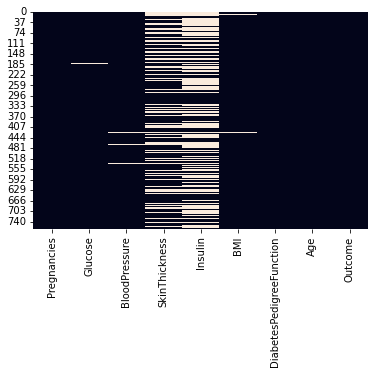

In [7]:
#====================================================
# Using heatmap to check for missing values
#----------------------------------------------------
sns.heatmap(diabetes_c.isnull(), cbar = False)

### Missing Data Imputation

  - Filling (or imputing) missing data points is not an easy task, because there several techniques, some of them are simple such as mean and median imputation, and some are even machine learning algorithms such regression or KNN.
  - Imputation requires a deep understanding of your data, the distribution of variables, otherwise, you would build a bias model. So, handling missing data must be done carefully. (We will dedicate a whole lecture for missing data techniques in our future lectures)
  
- The first step, we will plot the distribution of each variable.

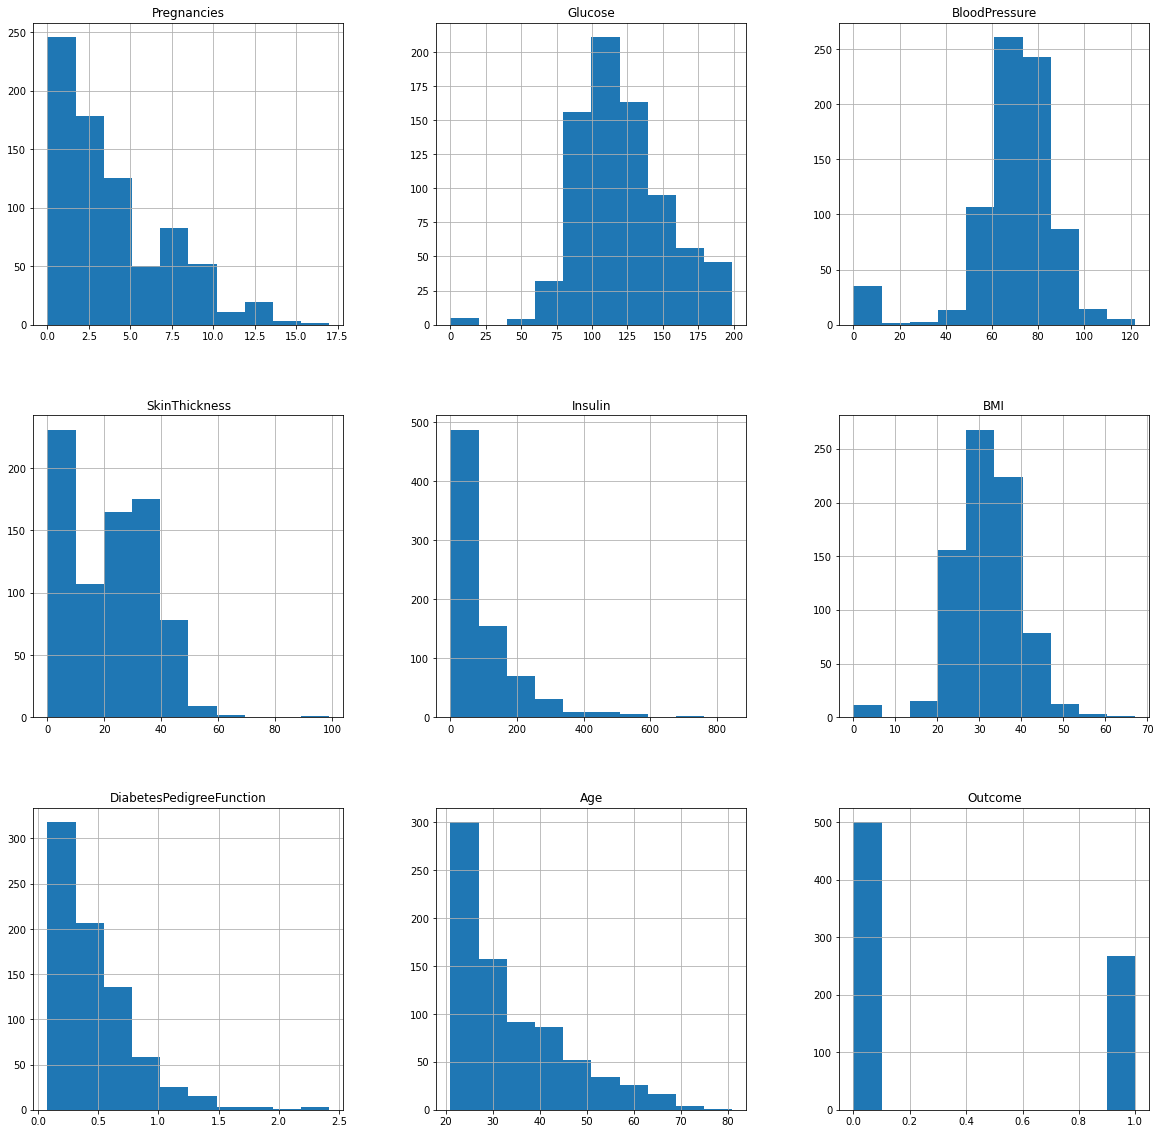

In [8]:
_ = diabeties.hist(figsize = (20,20))

In [9]:
#====================================================
#     Simple Missing Data Imputation
#----------------------------------------------------

diabetes_c['Glucose'].fillna(diabetes_c['Glucose'].mean(), inplace = True)
diabetes_c['BloodPressure'].fillna(diabetes_c['BloodPressure'].mean(), inplace = True)
diabetes_c['SkinThickness'].fillna(diabetes_c['SkinThickness'].median(), inplace = True)
diabetes_c['Insulin'].fillna(diabetes_c['Insulin'].median(), inplace = True)
diabetes_c['BMI'].fillna(diabetes_c['BMI'].median(), inplace = True)

# Print the Summary statistics of imputed data
diabetes_c.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,121.687,30.436,44.000,99.750,117.000,140.250,199.000
BloodPressure,768.000,72.405,12.096,24.000,64.000,72.203,80.000,122.000
SkinThickness,768.000,29.108,8.791,7.000,25.000,29.000,32.000,99.000
Insulin,768.000,140.672,86.383,14.000,121.500,125.000,127.250,846.000
BMI,768.000,32.455,6.875,18.200,27.500,32.300,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


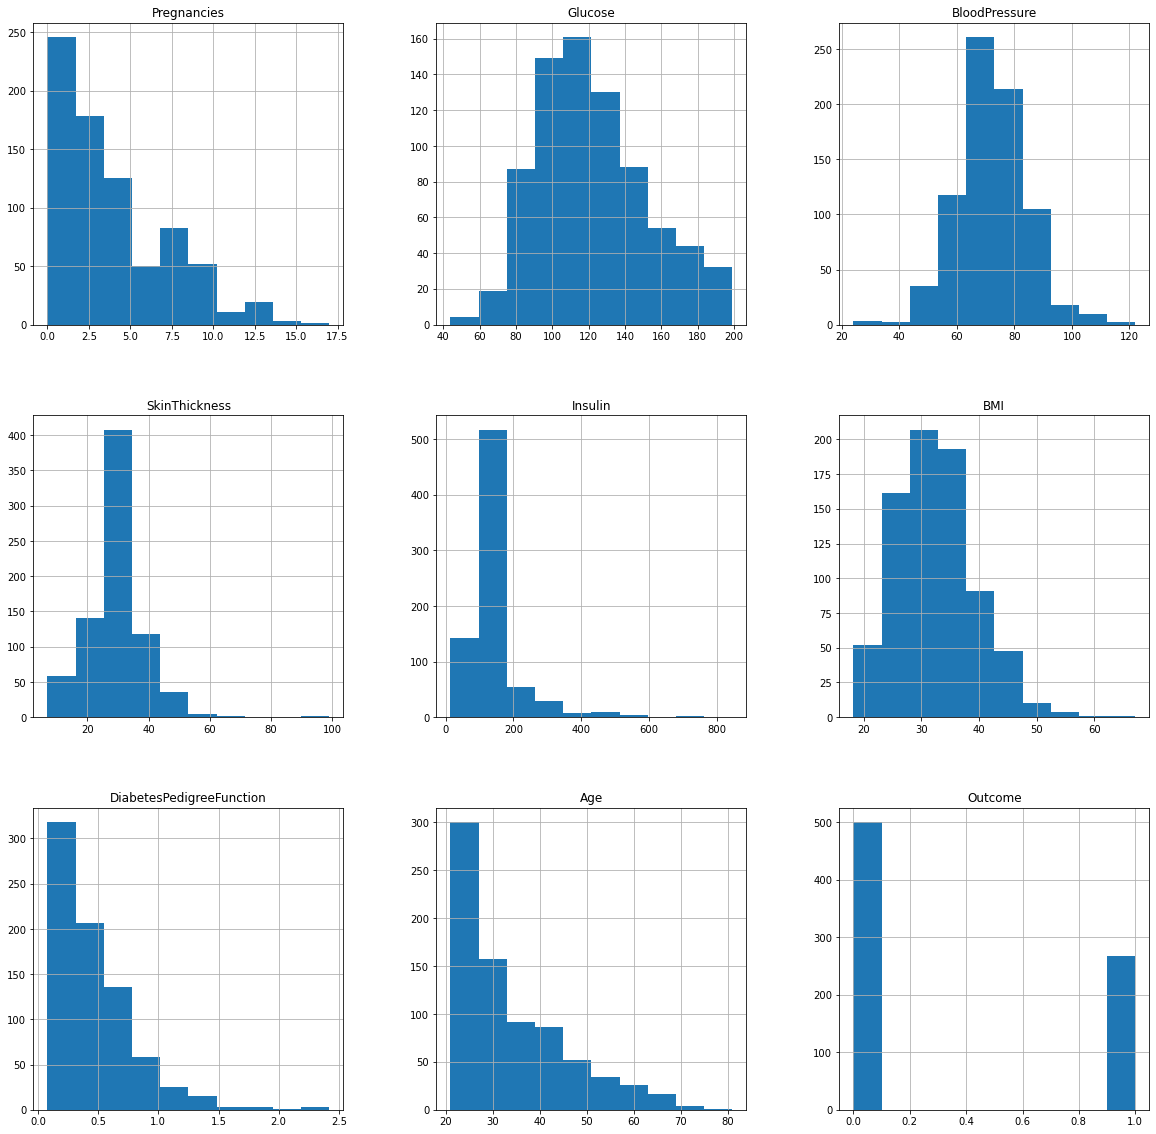

In [10]:
#====================================================
#     Variable Distributions after Imputation
#----------------------------------------------------

_ = diabetes_c.hist(figsize = (20,20))

## Correlation Among Variables

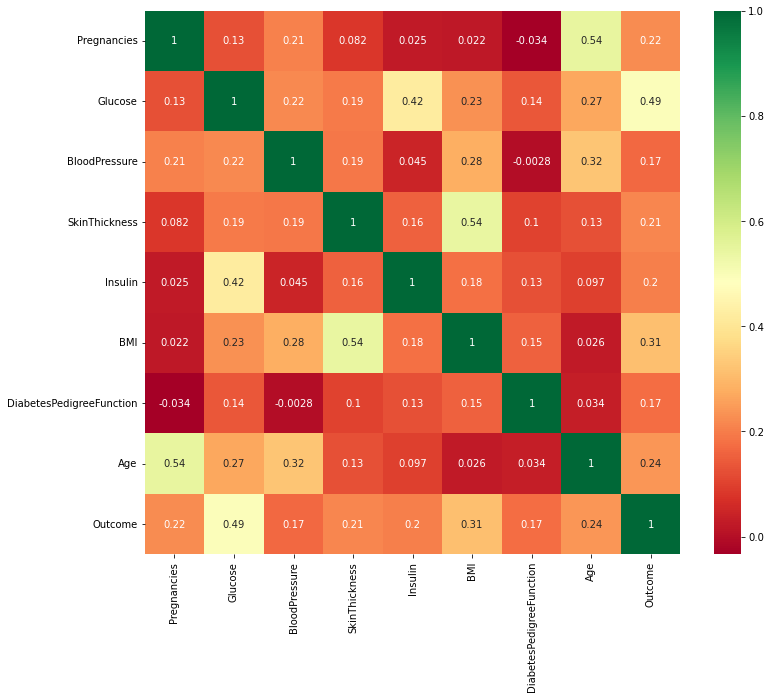

In [11]:
#====================================================
#     The Correlation Matrix 
#----------------------------------------------------

plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_c.corr(), annot=True, cmap ='RdYlGn')

## Standardization

- A commonly used scaler is called **standardization**. Standardization finds the mean of your data and centers your distribution around it, calculating the number of standard deviations away from the mean each point is. These values (the number of standard deviations) are then used as your new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.

### Standardization in Python:

-  First import `StandardScaler` from `scikit-learn`.
- Instantiate and object.
- Fit the scaler on your data. 
- Once fitted you can apply it to your data.

## $$x_{stand}=\frac{x - mean(X)}{standard\ \ deviation(X)}$$

# Mathematical Notation of Standardization 

## <u>Standardazition Formula</u>

### $$z = \frac{x - \mu}{\sigma}$$

## <u>The mean</u>

### $$\mu = \frac{1}{N} \sum_{i=1}^N (x_i)$$

## <u>The Standard Deviation</u>

### $$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}$$


## Standardization in Python Syntax:

```python
#Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
standardizer = StandardScaler()

# Fit and Transform the data
df = standardizer.fit_transform(df)
```

In [12]:
#====================================================
#         Importing Standard Scaler
#----------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Create StandardScaler Object

std_sc = StandardScaler()

In [13]:
# Standardize the features
# -------------------------
X = diabetes_c.drop(["Outcome"],axis = 1)
X = std_sc.fit_transform(X)
y = diabetes_c.Outcome

# Descibe the scaled features
#----------------------------
X_df = pd.DataFrame(X, columns=diabetes_c.columns[:-1])
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,0.000,1.001,-1.142,-0.845,-0.251,0.640,3.907
Glucose,768.000,-0.000,1.001,-2.554,-0.721,-0.154,0.610,2.542
BloodPressure,768.000,0.000,1.001,-4.004,-0.695,-0.017,0.628,4.103
SkinThickness,768.000,-0.000,1.001,-2.516,-0.468,-0.012,0.329,7.955
Insulin,768.000,0.000,1.001,-1.467,-0.222,-0.182,-0.155,8.170
BMI,768.000,0.000,1.001,-2.075,-0.721,-0.023,0.603,5.042
DiabetesPedigreeFunction,768.000,0.000,1.001,-1.190,-0.689,-0.300,0.466,5.884
Age,768.000,0.000,1.001,-1.042,-0.786,-0.361,0.660,4.064


# Training Logistic Regression Model

In [14]:
## Set the y and X values
y = diabetes_c['Outcome'].values
X = X_df.values

## Print the shape of the target and the features
# ----------------------------------------------
print("The feautures shape is: ", X.shape)
print("The target shape is: ", y.shape)

The feautures shape is:  (768, 8)
The target shape is:  (768,)


## Split The Data into Train/ Test Set

In [15]:
# Split the data into train-test set
# ----------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.75,
                                                    test_size = 0.25, 
                                                    random_state = 10123)

print("The train features shape is: ", X_train.shape)
print("The test features shape is: ", X_test.shape)
print("The train target shape is: ", y_train.shape)
print("The test target shape is: ", y_test.shape)

The train features shape is:  (576, 8)
The test features shape is:  (192, 8)
The train target shape is:  (576,)
The test target shape is:  (192,)


In [16]:
##==================================================
##      Train Logistic Regression Classifier
##==================================================

# Import the Logistic Classifier
from sklearn.linear_model import LogisticRegression

# Import Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report

# Create the classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102  12]
 [ 29  49]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       114
           1       0.80      0.63      0.71        78

    accuracy                           0.79       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.79      0.79      0.78       192



Text(0.5, 15.0, 'Predicted label')

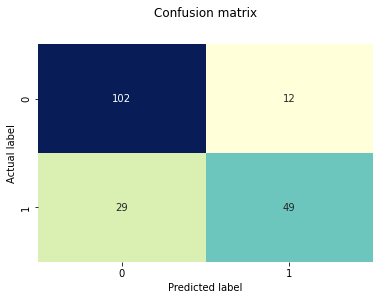

In [17]:
##==================================================
##      Plot the Confusion Matrix 
##==================================================

cm = confusion_matrix(y_test, y_pred)
_ = sns.heatmap(pd.DataFrame(cm),
                annot = True, 
                cmap = "YlGnBu",
                fmt = 'g',
                cbar = False)

plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## The Model Performance Using ROC Curve

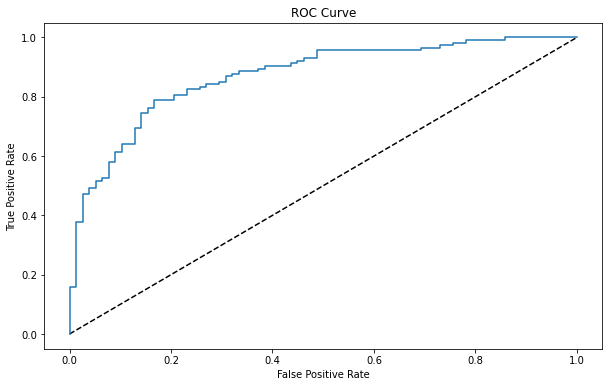

In [18]:
##==================================================
##      Check the model Peformance Using ROC curve
##==================================================

# Import the roc_curve
# --------------------
from sklearn.metrics import roc_curve

# Compute predicted probabilities
# --------------------------------
y_pred_prob = logreg.predict_proba(X_test)[:,0]
 
# Generate ROC curve values: fpr, tpr, thresholds
# -----------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
#-----------------
plt.figure(figsize=(10, 6))
_ = plt.plot([0, 1], [0, 1], 'k--')
_ = plt.plot(tpr, fpr)
_ = plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## The Model Performance Using AUC Using Cross Validation

In [19]:
##==================================================
##      Check the model Peformance Using AUC
##==================================================
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities
# --------------------------------
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8702204228520019


In [20]:
##==================================================
##      Using Cross Validation 
##==================================================
# Compute cross-validated AUC scores
cv_auc = cross_val_score(logreg, X, y, cv = 5, 
                         scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation:\n {}, \n".format(cv_auc))

# Print the mean of AUCs
print("The mean of AUC using 5-fold CV is:\n {}".format(np.mean(cv_auc)))

AUC scores computed using 5-fold cross-validation:
 [0.81407407 0.80037037 0.85296296 0.8845283  0.84207547], 

The mean of AUC using 5-fold CV is:
 0.8388022361984626


## Hyper Parameter Tuning for Logistic Classifier

 - Like the alpha parameter of lasso and ridge regularization logistic regression also has a regularization parameter: `C` that controls the inverse of the regularization strength. 
 
 - A large C can lead to an overfit model, while a small  can lead to an underfit model.

 - In addition to `C`, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. 

In [21]:
# Print the parameters of logistic model
# -------------------------------------
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [22]:
##==================================================
##      Hyperparameter Tune Logistic Regression
##==================================================
   
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, -1, 50)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, 
                         param_grid = param_grid,
                         cv = 5, 
                        refit=True, 
                        return_train_score=True)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("="*70)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("="*70)
print("Best score is {}".format(logreg_cv.best_score_))
print("="*70)

Tuned Logistic Regression Parameters: {'C': 0.018420699693267144}
Best score is 0.7708428826075885


## Mean Train / Test Error in Cross Validation 

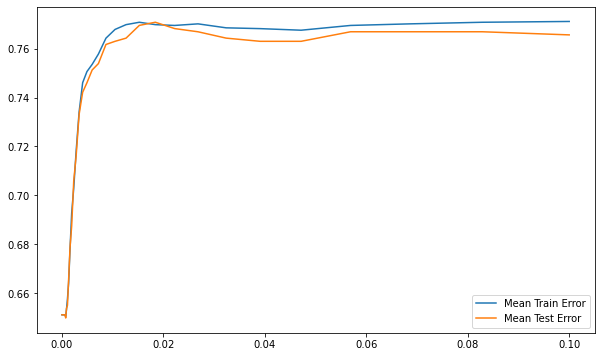

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(c_space, logreg_cv.cv_results_['mean_train_score'], label = "Mean Train Error")
plt.plot(c_space, logreg_cv.cv_results_['mean_test_score'], label = "Mean Test Error")
plt.legend()
plt.show()

Text(0.5, 15.0, 'Predicted label')

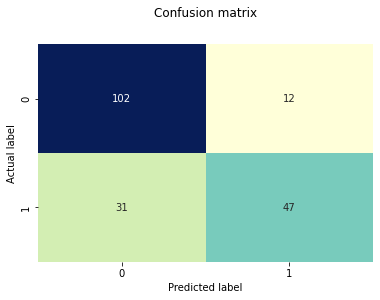

In [24]:
##==================================================
##      Plot The Classification Results
##==================================================
cm = confusion_matrix(y_test, logreg_cv.predict(X_test))
_ = sns.heatmap(pd.DataFrame(cm),
                annot = True, 
                cmap = "YlGnBu",
                fmt = 'g',
                cbar = False)

plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Honest Assessment with Cross Validation, Train-Test

In [25]:
# Split the data into train-test set
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.75,
                                                    test_size = 0.25, 
                                                    random_state = 10123)


# Setup the hyperparameter grid
c_space = np.logspace(-5, -1, 50)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, 
                         param_grid = param_grid,
                         cv = 5, 
                         refit=True)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("="*70)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("="*70)
print("Best score is {}".format(logreg_cv.best_score_))
print("="*70)

# Test The model on Test Set
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

Tuned Logistic Regression Parameters: {'C': 0.05689866029018293}
Best score is 0.7639130434782608
AUC: 0.8695456590193432


## Bonus Lecture: KNN Classifier

In [26]:
##==================================================
##       Train KNN Classifier
##==================================================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[105   9]
 [ 37  41]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       114
           1       0.82      0.53      0.64        78

    accuracy                           0.76       192
   macro avg       0.78      0.72      0.73       192
weighted avg       0.77      0.76      0.75       192



## Decision Tree Classifier

In [27]:
##==================================================
##      Train and Tune a Decision Tree Classifier
##==================================================

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Classifier Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Logistic Classifier Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.7409048467871997


In [28]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, tree_cv.predict(X_test)))
                       
print(classification_report(y_test, tree_cv.predict(X_test)))

[[104  10]
 [ 34  44]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.83       114
           1       0.81      0.56      0.67        78

    accuracy                           0.77       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.78      0.77      0.76       192



Text(0.5, 15.0, 'Predicted label')

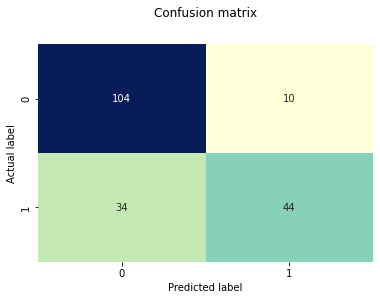

In [29]:
cm = confusion_matrix(y_test, tree_cv.predict(X_test))
_ = sns.heatmap(pd.DataFrame(cm),
                annot = True, 
                cmap = "YlGnBu",
                fmt = 'g',
                cbar = False)

plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')